# EDA

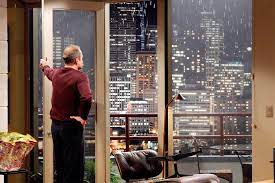

In [ ]:
#Access data of dbeaver and join two tables
join = """
SELECT 
    kchs.price,
    kchs.date,
    kchd.*
FROM eda.king_county_house_sales AS kchs
INNER JOIN eda.king_county_house_details AS kchd
    ON kchs.house_id = kchd.id;
"""
df_psycopg = pd.read_sql(join, conn)

In [ ]:
#Explore data
df_psycopg.head()
df_psycopg.info
df_psycopg.describe()

In [ ]:
#Export data to csv file
df_psycopg.to_csv('data/eda-joined.csv',index=False)

In [ ]:
#open csv file in new dataframe
df_eda = pd.read_csv('data/eda-joined.csv')
print(df_eda.head())

In [ ]:
#Column names were renamed for better readability and interpretation during the analysis.
#First attempt
df_eda = df_eda.rename(columns={'sqft_neighbor_living_area': 'sqft_15_neighbor_living_area', 'sqft_neighbor_property_size': 'sqft_15_neighbor_property_size'})
df_eda.columns

In [ ]:
#Second attempt
df_eda = df_eda.rename(columns={
    'date': 'sale_date', 
    'living_area': 'sqft_living_area', 
    'property_size': 'sqft_property_size', 
    'condition': 'condition_house',
    'grade': 'house_quality',
    'living_area_above_ground': 'sqft_living_area_above_ground',
    'living_area_basement': 'sqft_living_area_basement'})
df_eda.columns

In [ ]:
#Duplicate check
df_eda.duplicated().value_counts()

In [ ]:
# replacing dashes with backslashes in column sale_date for better readability
df_eda['sale_date'] = df_eda['sale_date'].str.replace('-','/')
df_eda.head()

In [ ]:
#check data types
df_eda.dtypes

In [ ]:
# List of columns, that should be integers but are currently floats due to NaN values
int_columns = [
    'bedrooms', 
    'floors', 
    'yr_renovated', 
    'waterfront',
    'view'
]

# NaN → 0 and then converting to integer - if values are missing, i assume that the value is 0, e.g. if there is no waterfront, then the value is 0 and not NaN
for col in int_columns:
    df_eda[col] = df_eda[col].fillna(0).astype(int)

In [ ]:
#display column "price" with 2 decimal places
df_eda['price'] = df_eda['price'].round(2)
df_eda.head()


In [ ]:
# create new column "living_area_plot" with rounded values of "living_area" for better visualization in the plots
df_eda['living_area_plot'] = df_eda['sqft_living_area'].round(0)

In [ ]:
#check column year renovated
df_eda['yr_renovated'].unique()

In [ ]:
#All values in the column "yr_renovated" should be years, but all values are higher than 3000, which is not possible. I assume that these values are typos and should be divided by 10 to get the correct year.
df_eda.loc[df_eda['yr_renovated'] > 3000, 'yr_renovated'] = (
    df_eda.loc[df_eda['yr_renovated'] > 3000, 'yr_renovated'] / 10
)

In [ ]:
#realized i forgot to check for missing data, so i saved and opened the eda-joined csv file again
df_eda.to_csv('data/eda-data-cleaned.csv',index=False)
df_eda2 = pd.read_csv('data/eda-joined.csv')

In [ ]:
import missingno as msno

In [ ]:
#checking numbers of missing values per column
df_eda2.isna().sum()

In [ ]:
#checking percentage of missing values per column
msno.bar(df_eda2)

In [ ]:
#Checking distribution of missing data in dataset
msno.matrix(df_eda2)

Descided that my table should be alright, even though i haven't checked with missingo on missing data. So i decided to continue working with eda-data-cleaned. All the code above was written in the fetching data jupyter notebook. All the code below is from the EDA notebook. 

In [49]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [50]:
df_eda_project = pd.read_csv('data/eda-data-cleaned.csv')
df_eda_project.dtypes

price                             float64
sale_date                             str
id                                  int64
bedrooms                            int64
bathrooms                         float64
sqft_living_area                  float64
sqft_property_size                float64
floors                              int64
waterfront                          int64
view                                int64
condition_house                     int64
house_quality                       int64
sqft_living_area_above_ground     float64
sqft_living_area_basement         float64
yr_built                            int64
yr_renovated                        int64
zipcode                             int64
lat                               float64
long                              float64
sqft_15_neighbor_living_area      float64
sqft_15_neighbor_property_size    float64
dtype: object

In [51]:
#Columns with float values that will be rounded to 2 decimal places for better readability and interpretation during the analysis.
float_columns_to_round = [
    'price', 
    'bathrooms', 
    'sqft_living_area', 
    'sqft_property_size',
    'sqft_living_area_above_ground',
    'sqft_living_area_basement',
    'sqft_15_neighbor_living_area',
    'sqft_15_neighbor_property_size'
]
for col in float_columns_to_round:
    df_eda_project[col] = df_eda_project[col].round(2)

In [56]:
## change "sale_date" dtype to datetime with format %Y/%m/%d
df_eda_project['sale_date'] = df_eda_project['sale_date'].str.replace('-','/')
df_eda_project['sale_date'] = pd.to_datetime(df_eda_project['sale_date'], format='%Y/%m/%d')


AttributeError: Can only use .str accessor with string values, not datetime64

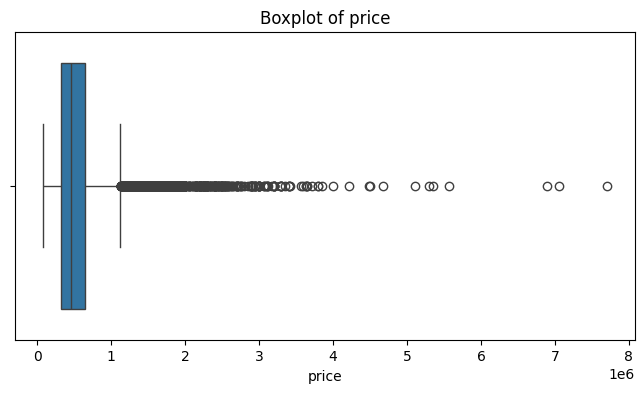

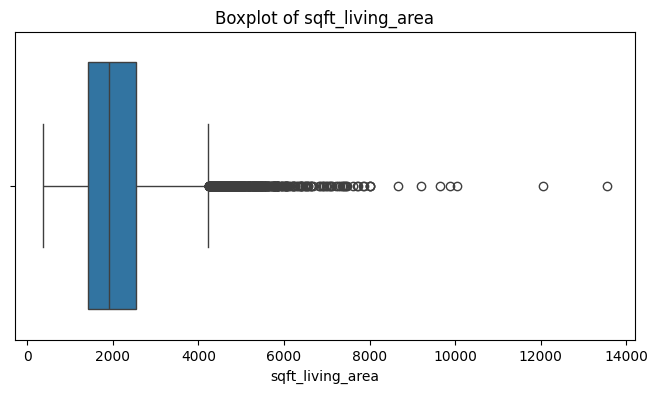

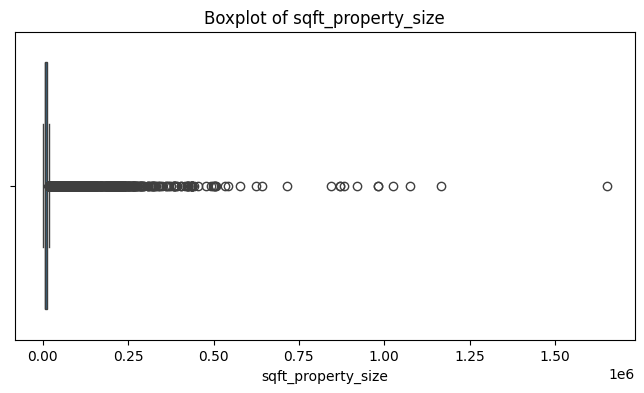

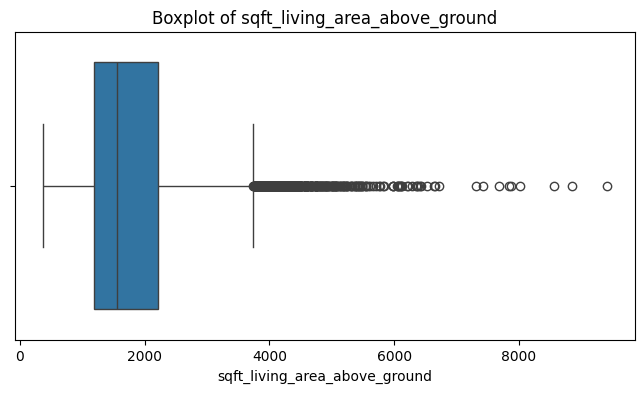

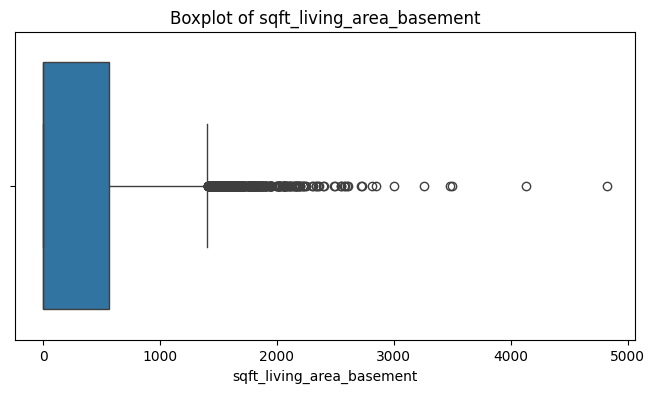

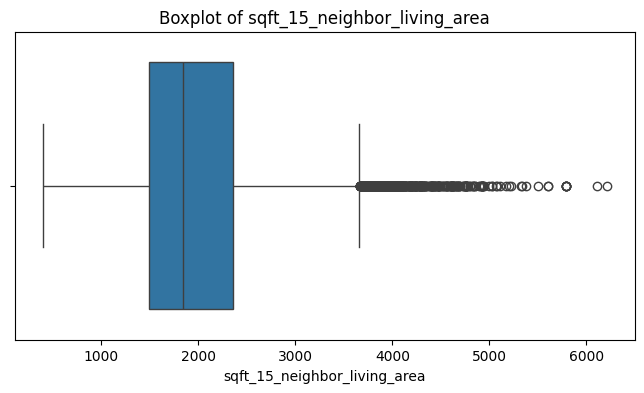

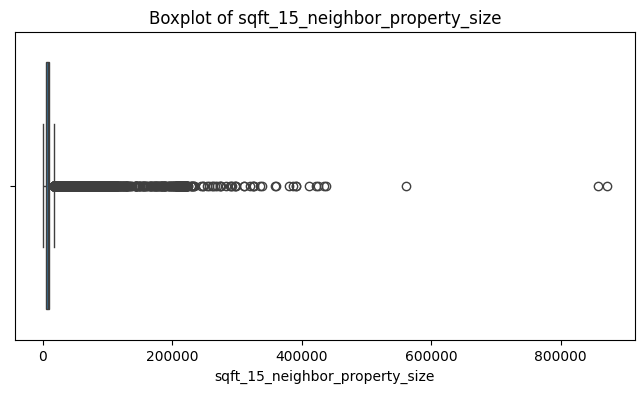

In [59]:
#Searching for outliers using a botplox

numeric_cols = ['price', 'sqft_living_area', 'sqft_property_size', 
                'sqft_living_area_above_ground', 'sqft_living_area_basement', 
                'sqft_15_neighbor_living_area', 'sqft_15_neighbor_property_size']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_eda_project[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

A few columns have outliers values in it. But for now i decided to not delete them. I more likely think about working with log instead. 

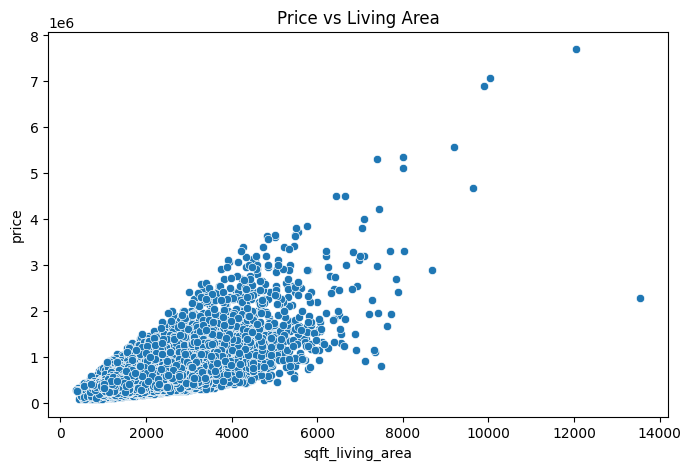

In [ ]:
#Checking if Price and Living Area are correlated
sns.scatterplot(data=df_eda_project, x='sqft_living_area', y='price')
plt.title('Price vs Living Area')
plt.show()

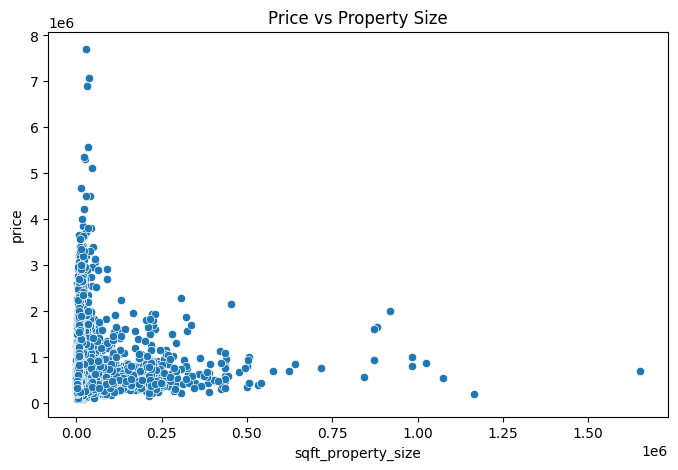

In [ ]:
#Checking again for price and sqft property price
sns.scatterplot(data=df_eda_project, x='sqft_property_size', y='price')
plt.title('Price vs Property Size')
plt.show()

In [ ]:
#Checking for outliers in column price
Q1 = df_eda_project['price'].quantile(0.25)
Q3 = df_eda_project['price'].quantile(0.75)
IQR = Q3 - Q1

outliers_price = df_eda_project[(df_eda_project['price'] < Q1 - 1.5*IQR) | (df_eda_project['price'] > Q3 + 1.5*IQR)]
outliers_price[['price','sqft_living_area','sqft_property_size']]

,price,sqft_living_area,sqft_property_size
5,1230000.000,5420.000,101930.000
21,2000000.000,3050.000,44867.000
49,1350000.000,2753.000,65005.000
69,1330000.000,3200.000,20158.000
125,1450000.000,2750.000,17789.000
...,...,...,...
21552,1700000.000,3830.000,8963.000
21560,3570000.000,4850.000,10584.000
21574,1220000.000,4910.000,9444.000
21581,1580000.000,3410.000,10125.000


In [ ]:
#Checking for  outliers in columns sqft_living_area
Q1 = df_eda_project['sqft_living_area'].quantile(0.25)
Q3 = df_eda_project['sqft_living_area'].quantile(0.75)
IQR = Q3 - Q1

outliers_living_area = df_eda_project[(df_eda_project['sqft_living_area'] < Q1 - 1.5*IQR) | (df_eda_project['sqft_living_area'] > Q3 + 1.5*IQR)]
outliers_living_area[['price','sqft_living_area','sqft_property_size']]

,price,sqft_living_area,sqft_property_size
5,1230000.000,5420.000,101930.000
70,1040000.000,4770.000,50094.000
115,740500.000,4380.000,6350.000
153,2250000.000,5180.000,19850.000
239,472000.000,4410.000,14034.000
...,...,...,...
21535,1380000.000,4350.000,13405.000
21545,750000.000,4500.000,8130.000
21560,3570000.000,4850.000,10584.000
21574,1220000.000,4910.000,9444.000


In [ ]:
#Checking for outliers in column sqft_property_size for better overview of data
Q1 = df_eda_project['sqft_property_size'].quantile(0.25)
Q3 = df_eda_project['sqft_property_size'].quantile(0.75)
IQR = Q3 - Q1

outliers_property_size = df_eda_project[(df_eda_project['sqft_property_size'] < Q1 - 1.5*IQR) | (df_eda_project['sqft_property_size'] > Q3 + 1.5*IQR)]
outliers_property_size[['price','sqft_living_area','sqft_property_size']]

,price,sqft_living_area,sqft_property_size
5,1230000.000,5420.000,101930.000
12,310000.000,1430.000,19901.000
21,2000000.000,3050.000,44867.000
36,550000.000,1660.000,34848.000
41,775000.000,4220.000,24186.000
...,...,...,...
21478,915000.000,3850.000,62726.000
21490,2240000.000,7270.000,130017.000
21504,1410000.000,4920.000,50621.000
21509,1450000.000,4300.000,108865.000


In [ ]:
#realized that i still have missing values in sqft_living_area_basement column
import missingno as msno
df_eda_project.isna().sum()

price                               0
sale_date                           0
id                                  0
bedrooms                            0
bathrooms                           0
sqft_living_area                    0
sqft_property_size                  0
floors                              0
waterfront                          0
view                                0
condition_house                     0
house_quality                       0
sqft_living_area_above_ground       0
sqft_living_area_basement         452
yr_built                            0
yr_renovated                        0
zipcode                             0
lat                                 0
long                                0
sqft_15_neighbor_living_area        0
sqft_15_neighbor_property_size      0
dtype: int64

In [ ]:
#Filled empty rows with 0.
df_eda_project['sqft_living_area_basement'] = df_eda_project['sqft_living_area_basement'].fillna(0).astype(float)

In [68]:
#check consistency of above ground and basement = living area
inconsistent_living = df_eda_project[
    df_eda_project['sqft_living_area_above_ground'] + df_eda_project['sqft_living_area_basement'] != df_eda_project['sqft_living_area']
]
print(inconsistent_living[['sqft_living_area','sqft_living_area_above_ground','sqft_living_area_basement']])

       sqft_living_area  sqft_living_area_above_ground  \
112            1540.000                       1160.000   
115            4380.000                       2780.000   
309            3320.000                       2220.000   
384            4800.000                       3480.000   
508            1540.000                        820.000   
...                 ...                            ...   
21000          1410.000                       1290.000   
21109          2910.000                       2040.000   
21210          1170.000                       1070.000   
21356          4460.000                       3280.000   
21442          2360.000                       1390.000   

       sqft_living_area_basement  
112                        0.000  
115                        0.000  
309                        0.000  
384                        0.000  
508                        0.000  
...                          ...  
21000                      0.000  
21109                  

In [69]:
# New column: True = consistent, False = inconsistent
df_eda_project['sqft_living_area_consistent'] = (
    df_eda_project['sqft_living_area'] == df_eda_project['sqft_living_area_above_ground'] + df_eda_project  ['sqft_living_area_basement']
)

In [70]:
# how many rows are inconsistent?
df_eda_project['sqft_living_area_consistent'].value_counts()

sqft_living_area_consistent
True     21428
False      169
Name: count, dtype: int64

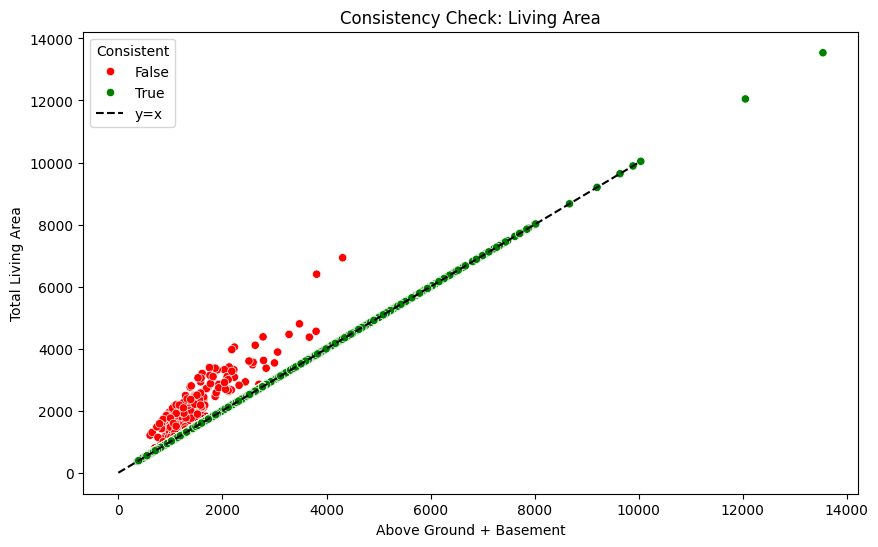

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_eda_project,
    x=df_eda_project['sqft_living_area_above_ground'] + df_eda_project['sqft_living_area_basement'],
    y=df_eda_project['sqft_living_area'],
    hue=df_eda_project['sqft_living_area_consistent'],
    palette={True: 'green', False: 'red'},
)
plt.plot([0, 10000], [0, 10000], 'k--', label='y=x')  # Referenzlinie
plt.xlabel('Above Ground + Basement')
plt.ylabel('Total Living Area')
plt.title('Consistency Check: Living Area')
plt.legend(title='Consistent')
plt.show()

There is a small inconsistency in this scatter plot. But the inconsitency can be explained with missing values in the sqft_basement column. 
As the basement and the above ground columns are not so important for my analysis, i will not do something against this inconsistency.

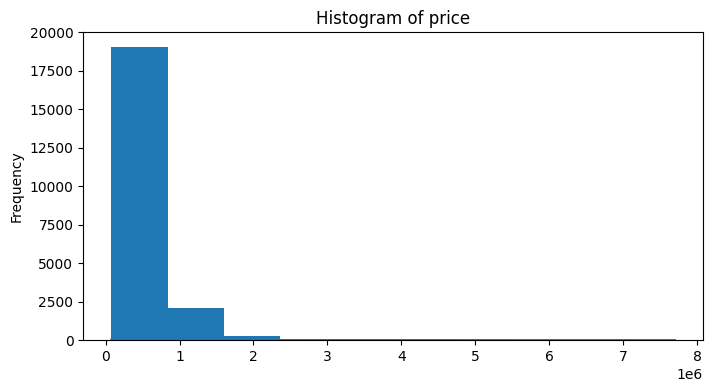

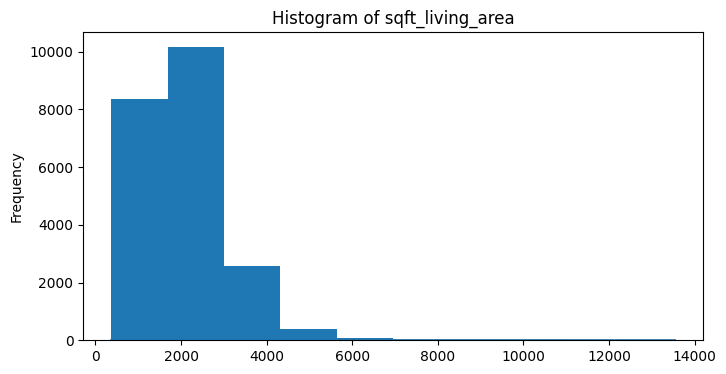

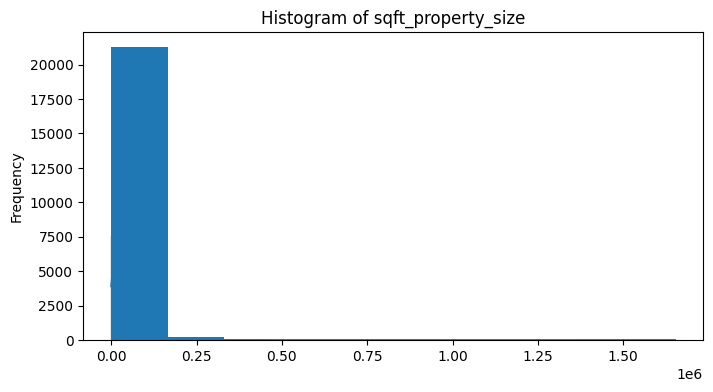

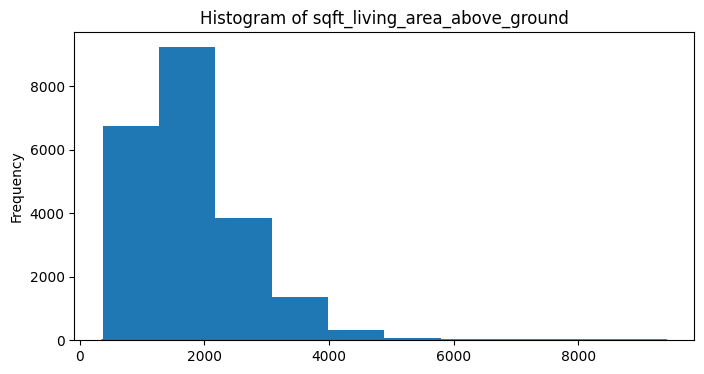

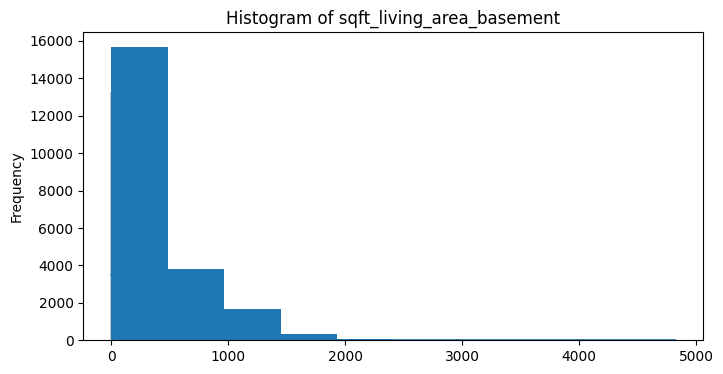

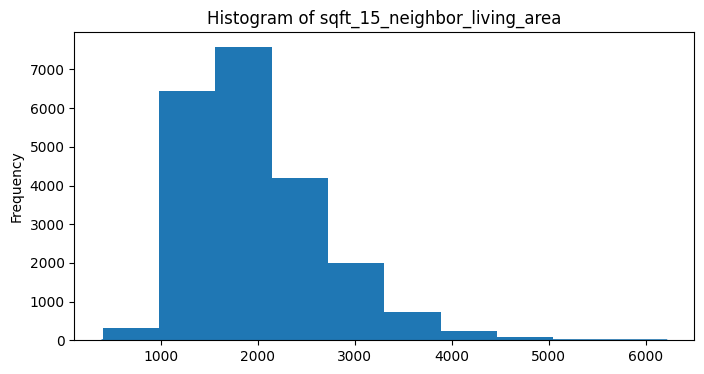

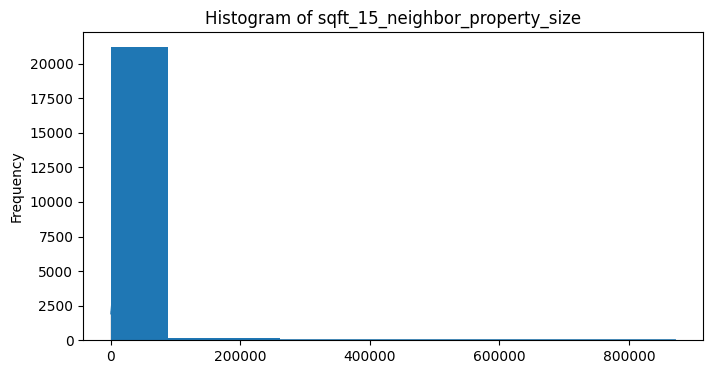

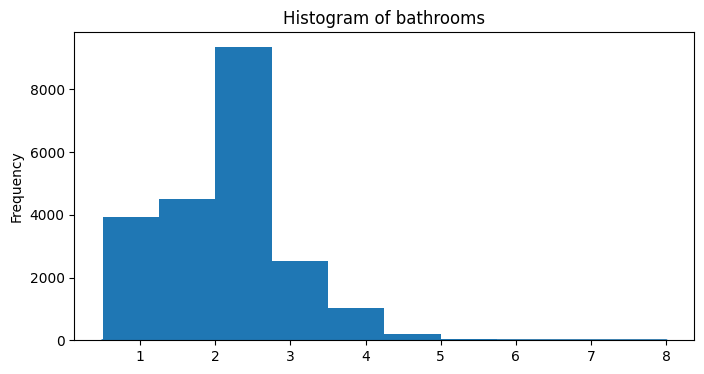

In [72]:
#histogram of numeric columns
numeric_cols = ['price', 'sqft_living_area', 'sqft_property_size', 'sqft_living_area_above_ground', 'sqft_living_area_basement', 'sqft_15_neighbor_living_area', 'sqft_15_neighbor_property_size', 'bathrooms' ]

for col in numeric_cols: 
    plt.figure(figsize=(8,4))
    sns.histplot(df_eda_project[col], kde=True)
    plt.title(f'Histogram of {col}')    
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    bin = 50


    df_eda_project[col].plot(kind='hist')

In [48]:
df_eda_project.describe()

,price,sale_date,id,bedrooms,bathrooms,sqft_living_area,sqft_property_size,floors,waterfront,view,...,lat,long,sqft_15_neighbor_living_area,sqft_15_neighbor_property_size,neighbor_property_size_clean,log_neighbor_property_size,price_clean,log_price,property_size_clean,log_property_size
count,21597.000,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,...,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,2014-10-29 04:20:38.171968,4580474287.771,3.373,2.116,2080.322,15099.409,1.446,0.007,0.233,...,47.560,-122.214,1986.620,12758.284,12759.284,8.961,540297.574,13.048,15100.409,8.990
min,78000.000,2014-05-02 00:00:00,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,...,47.156,-122.519,399.000,651.000,652.000,6.480,78001.000,11.264,521.000,6.256
25%,322000.000,2014-07-22 00:00:00,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,...,47.471,-122.328,1490.000,5100.000,5101.000,8.537,322001.000,12.682,5041.000,8.525
50%,450000.000,2014-10-16 00:00:00,3904930410.000,3.000,2.250,1910.000,7618.000,1.000,0.000,0.000,...,47.572,-122.231,1840.000,7620.000,7621.000,8.939,450001.000,13.017,7619.000,8.938
75%,645000.000,2015-02-17 00:00:00,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,...,47.678,-122.125,2360.000,10083.000,10084.000,9.219,645001.000,13.377,10686.000,9.277
max,7700000.000,2015-05-27 00:00:00,9900000190.000,33.000,8.000,13540.000,1651359.000,3.000,1.000,4.000,...,47.778,-121.315,6210.000,871200.000,871201.000,13.678,7700001.000,15.857,1651360.000,14.317
std,367368.140,NaN,2876735715.748,0.926,0.769,918.106,41412.637,0.552,0.082,0.765,...,0.139,0.141,685.230,27274.442,27274.442,0.812,367368.140,0.527,41412.637,0.902


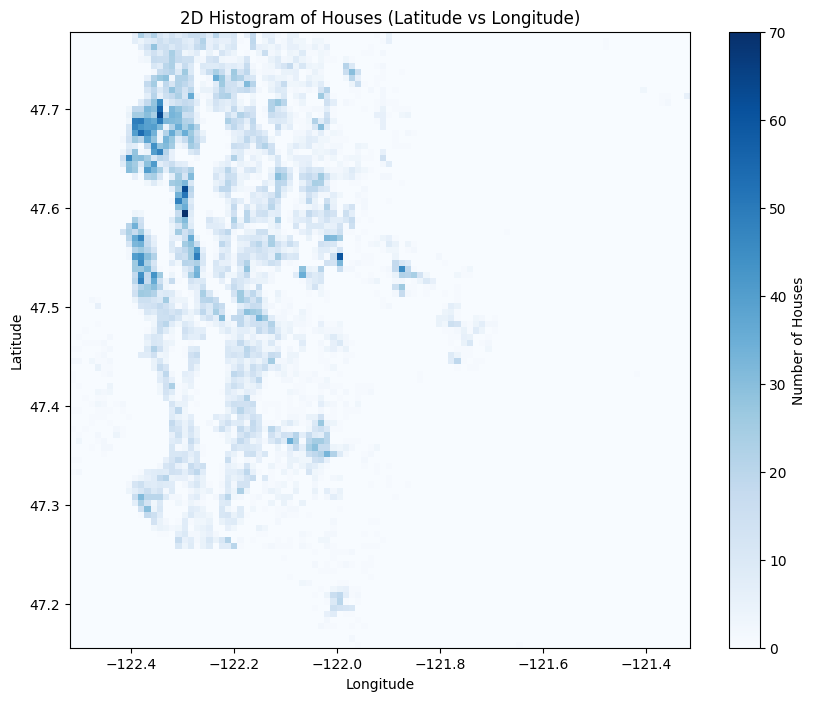

In [73]:
#2D histogram of latitude and longitude to visualize the distribution of houses across the area
import matplotlib.pyplot as plt

df_plot = df_eda_project 

plt.figure(figsize=(10,8))

plt.hist2d(
    df_plot['long'],       # X-Achse: Longitude
    df_plot['lat'],        # Y-Achse: Latitude
    bins=100,               # Anzahl der Bins auf jeder Achse, anpassen
    cmap='Blues'           # Farbpalette, kannst du ändern
)

plt.colorbar(label='Number of Houses')  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Histogram of Houses (Latitude vs Longitude)')
plt.show()

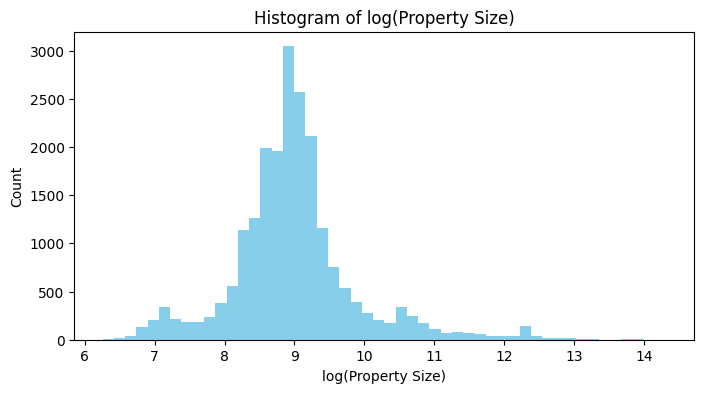

count   21597.000
mean        8.990
std         0.902
min         6.256
25%         8.525
50%         8.938
75%         9.277
max        14.317
Name: log_property_size, dtype: float64


In [ ]:
df_eda_project['property_size_clean'] = df_eda_project['sqft_property_size']

#Log transformation of property size to handle skewness and outliers, and to better visualize the distribution of property sizes.
df_eda_project['log_property_size'] = np.log(df_eda_project['property_size_clean'])

# histo of new column
plt.figure(figsize=(8,4))
plt.hist(df_eda_project['log_property_size'], bins=50, color='skyblue')
plt.title('Histogram of log(Property Size)')
plt.xlabel('log(Property Size)')
plt.ylabel('Count')
plt.show()

# Check Mean & Median
print(df_eda_project['log_property_size'].describe())

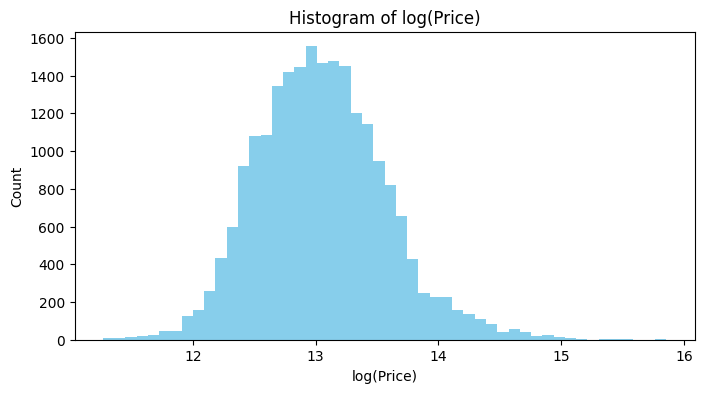

count   21597.000
mean       13.048
std         0.527
min        11.264
25%        12.682
50%        13.017
75%        13.377
max        15.857
Name: log_price, dtype: float64


In [ ]:
df_eda_project['price_clean'] = df_eda_project['price']

#Log transformation of property size to handle skewness and outliers, and to better visualize the distribution of property sizes.
df_eda_project['log_price'] = np.log(df_eda_project['price_clean'])

# histo of new column
plt.figure(figsize=(8,4))
plt.hist(df_eda_project['log_price'], bins=50, color='skyblue')
plt.title('Histogram of log(Price)')
plt.xlabel('log(Price)')
plt.ylabel('Count')
plt.show()

# Check Mean & Median
print(df_eda_project['log_price'].describe())

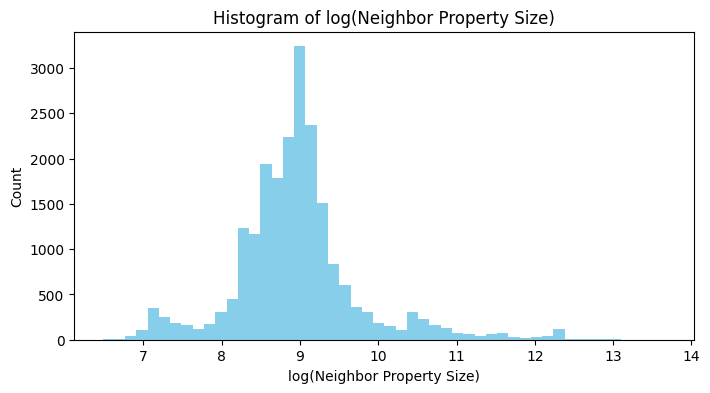

count   21597.000
mean        8.961
std         0.812
min         6.480
25%         8.537
50%         8.939
75%         9.219
max        13.678
Name: log_neighbor_property_size, dtype: float64


In [ ]:
df_eda_project['neighbor_property_size_clean'] = df_eda_project['sqft_15_neighbor_property_size']

#Log transformation of property size to handle skewness and outliers, and to better visualize the distribution of property sizes.
df_eda_project['log_neighbor_property_size'] = np.log(df_eda_project['neighbor_property_size_clean'])

# histo of new column
plt.figure(figsize=(8,4))
plt.hist(df_eda_project['log_neighbor_property_size'], bins=50, color='skyblue')
plt.title('Histogram of log(Neighbor Property Size)')
plt.xlabel('log(Neighbor Property Size)')
plt.ylabel('Count')
plt.show()

# Check Mean & Median
print(df_eda_project['log_neighbor_property_size'].describe())

Counts for floors:

floors
1    12583
2     8396
3      618
Name: count, dtype: int64




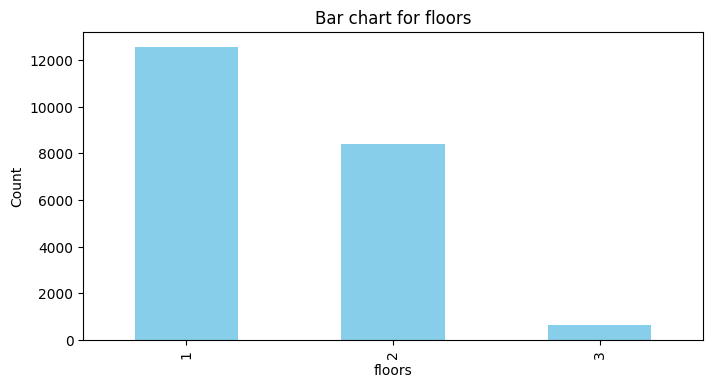

Counts for waterfront:

waterfront
0    21451
1      146
Name: count, dtype: int64




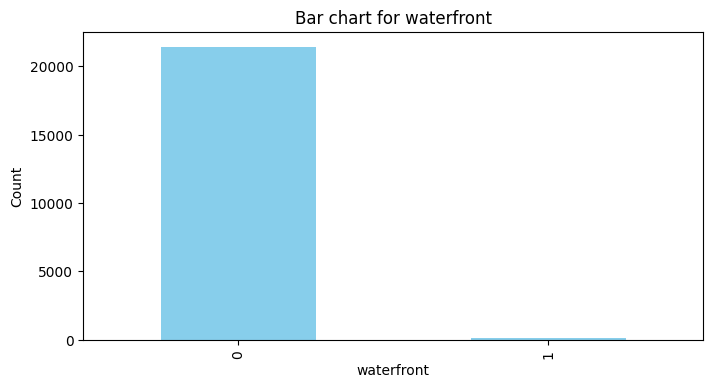

Counts for view:

view
0    19485
2      957
3      508
1      330
4      317
Name: count, dtype: int64




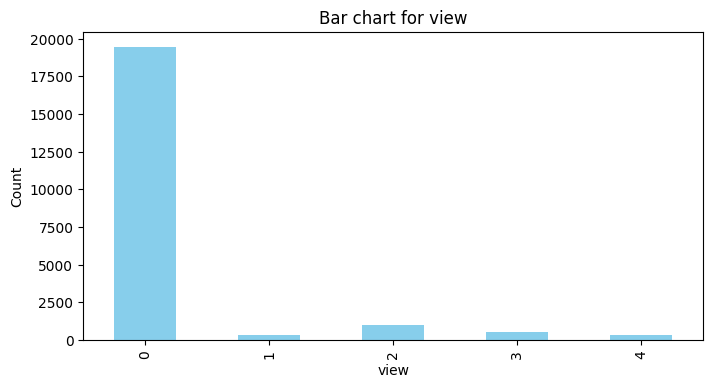

Counts for condition_house:

condition_house
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64




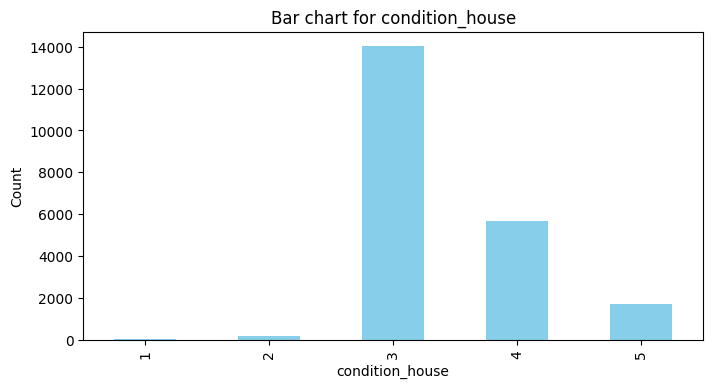

Counts for house_quality:

house_quality
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64




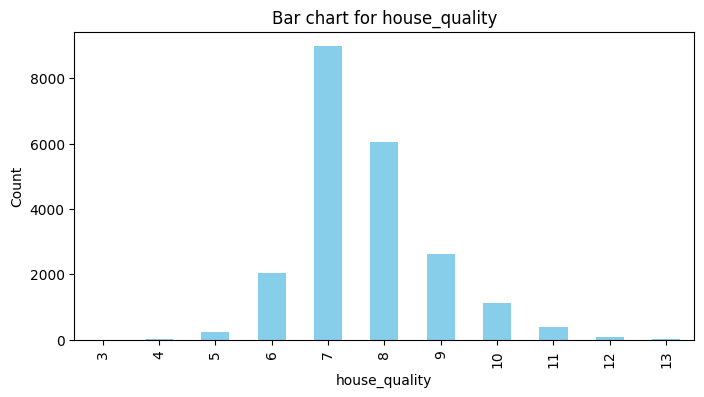

Counts for zipcode:

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64




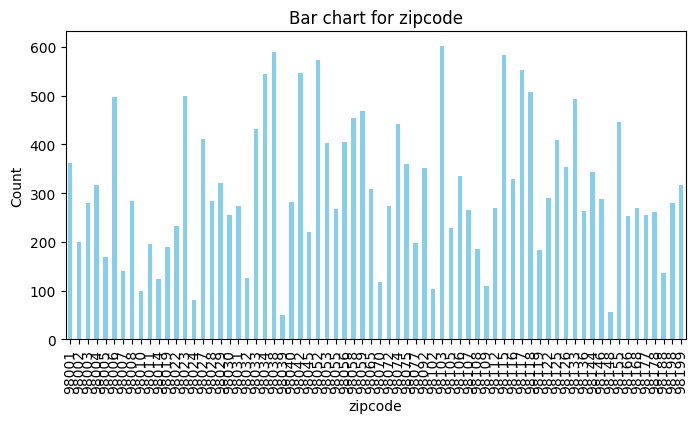

In [ ]:
# List of categorical variables to analyze
categorical_cols = ['floors', 'waterfront', 'view', 'condition_house', 'house_quality', 'zipcode']

for col in categorical_cols:
    print(f"Counts for {col}:\n")
    print(df_eda_project[col].value_counts())  
    print("\n")

    # Bar Chart
    plt.figure(figsize=(8,4))
    df_eda_project[col].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f"Bar chart for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


1. Skewness in Continuous Variables

After exploring the summary statistics using describe(), I observed that several variables were strongly right-skewed:
Variable  |	Mean  |  Median  |  Observation
---|---|---|---
Price	| 540,296 | 450,000	| Mean significantly higher than median → right-skewed
Property Size |	15,099 | 7,618	| Strong right-skewness
Neighbor Property Size | 12,758	| 7,620	| Strong right-skewness
Living Area | 2,080	| 1,910	| Slight right-skewness

The large difference between mean and median suggests the presence of extreme high values (outliers).

2. Transformation Applied

To reduce skewness and make the distributions more suitable for further analysis, I applied a logarithmic transformation.

For each selected variable:
- Missing values were replaced with 0 (if applicable).
- Since log(0) is undefined, I used log(x + 1).
- A new column was created to preserve the original values.

Example:

- property_size → log_property_size
- price → log_price

The transformed variables show a more balanced distribution and reduced impact of extreme values.

3. Outlier Handling

No extreme values were removed from the dataset. Because removing them could distort the analysis, so i keep all of them and preferred the transformation. 

4. Data Preservation

By creating new columns for the log-transformed variables, I preserved the original data. This allows for flexibility in analysis, enabling comparisons between the original and transformed variables without losing any information.

### Client: William Rodriguez (Buyer) - 2 people, country (best timing & non-renovated) & city house (fast & central location), wants two houses
Hypotheses: 
1. Larger properties are more important for country houses than for city houses.
2. Country houses that have not been renovated can still command good prices, as buyers prioritize land and location over modern updates.
3. Central locations show higher demand based on geographic price patterns.

### 1. Larger properties are more important for country houses than for city houses.

Definition of country houses: Often characterized by larger plots, if you compare it to the available living area, they tend to have more land and outdoor space compared to city houses. They don't have so many neighbors nearby and the neighbors plots are also larger.
In contrast, city houses are typically smaller in terms of land area and may have limited outdoor space due to the higher density of buildings and population. City house owners have more neighbors than country house owners.

#### Ratio of living area to property size:

In [78]:
df_building_density = df_eda_project['sqft_living_area'] / df_eda_project['sqft_property_size']
df_building_density.value_counts()

0.200    23
0.400    22
0.167    19
0.300    17
0.275    16
         ..
0.418     1
1.012     1
0.397     1
0.670     1
0.948     1
Name: count, Length: 19139, dtype: int64

<Axes: ylabel='Frequency'>

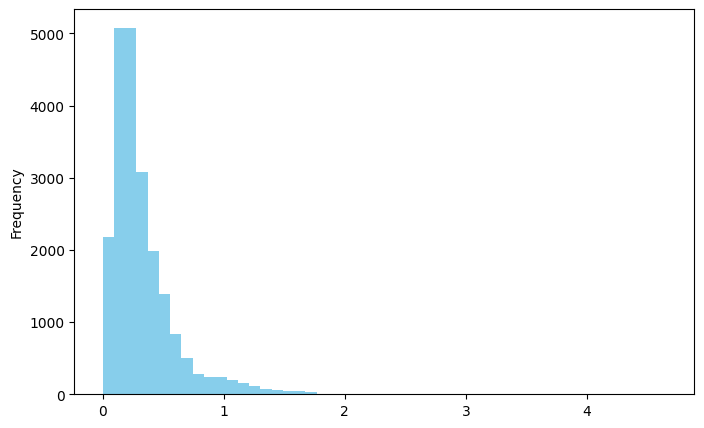

In [79]:
df_building_density.plot(kind='hist', bins=50, color='skyblue')

I want to work with the extremer values of the ratio of living area to property size, as they can provide insights into the differences between country and city houses.

Assumption:

Bottom Quartile: a lot of land -> Country houses

Top Quartile: less land -> City houses

In [81]:
#Quartile values for building density
q1 = 0.16
q3 = 0.41

In [ ]:
#Creating two new dataframes
df_country = df_eda_project[df_building_density <= q1]
df_city = df_eda_project[df_building_density >= q3]

Both dataframes have around 5000 rows, so the creating proccess can be seen as successful. 

Now we got our new dataframes and are able to compare the two groups of houses according to the price and the property size.

Next step: is price influenced by the property size for country houses more than for city houses?

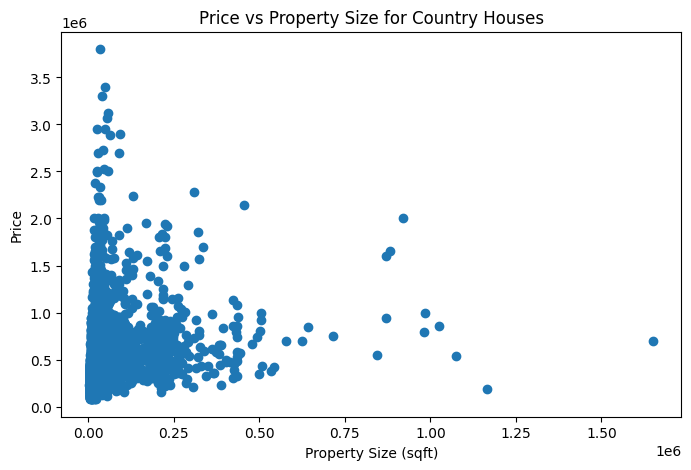

In [ ]:
#Price vs Property Size for Country Houses 
plt.scatter(df_country["sqft_property_size"], df_country["price"])

plt.xlabel("Property Size (sqft)")
plt.ylabel("Price")
plt.title("Price vs Property Size for Country Houses")

plt.show()

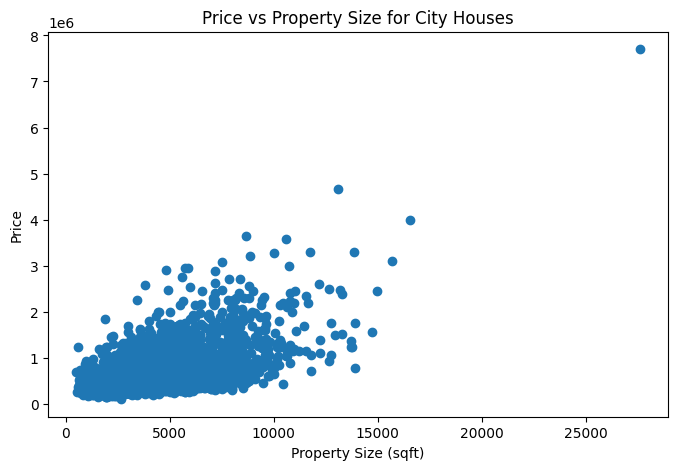

In [86]:
#Price vs Property Size for City Houses
plt.scatter(df_city["sqft_property_size"], df_city["price"])

plt.xlabel("Property Size (sqft)")
plt.ylabel("Price")
plt.title("Price vs Property Size for City Houses")
plt.show()

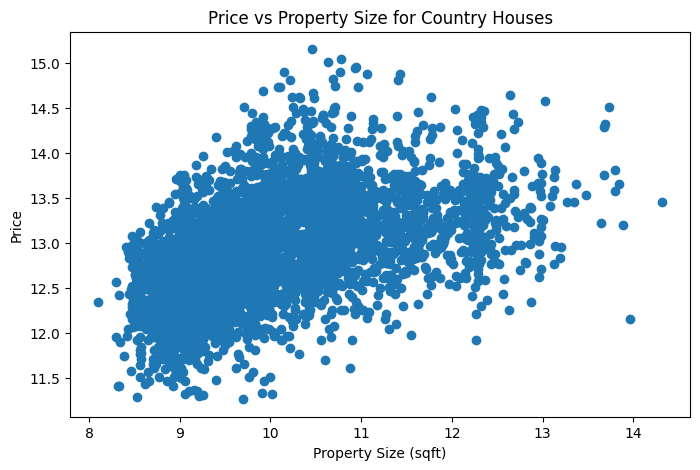

In [ ]:

#Scatter plot with Log values to exclude outliers. Again Price vs Property Size is displayed in this plot for country houses
plt.scatter(df_country["log_property_size"], df_country["log_price"])

plt.xlabel("Property Size (sqft)")
plt.ylabel("Price")
plt.title("Price vs Property Size for Country Houses")

plt.show()

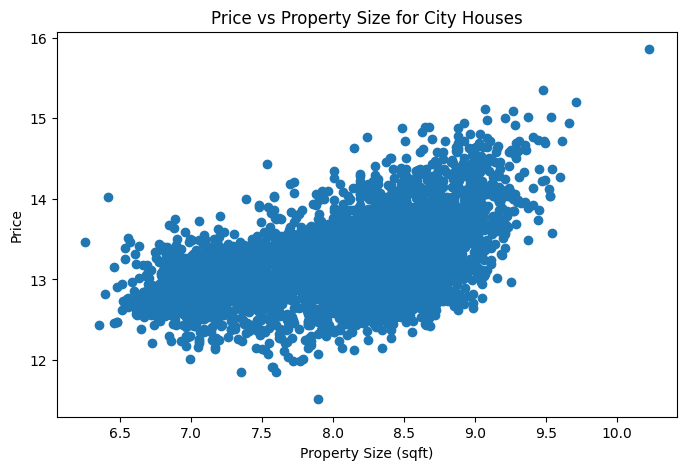

In [ ]:
#Scatter plot with Log values to exclude outliers. Again Price vs Property Size is displayed in this plot for city houses
plt.scatter(df_city["log_property_size"], df_city["log_price"])

plt.xlabel("Property Size (sqft)")
plt.ylabel("Price")
plt.title("Price vs Property Size for City Houses")
plt.show()

In [ ]:
#Compare correlation
df_country[['price', 'sqft_property_size']].corr()

,price,sqft_property_size
price,1.000,0.265
sqft_property_size,0.265,1.000


In [ ]:
#Compare correlation

df_country[['log_price', 'log_property_size']].corr()

,log_price,log_property_size
log_price,1.000,0.526
log_property_size,0.526,1.000


In [ ]:
#Compare correlation
df_city[['price', 'sqft_property_size']].corr()

,price,sqft_property_size
price,1.000,0.539
sqft_property_size,0.539,1.000


In [ ]:
#Compare correlation
df_city[['log_price', 'log_property_size']].corr()

,log_price,log_property_size
log_price,1.000,0.481
log_property_size,0.481,1.000


The correlation between property size and price is 0.26 for country houses and 0.54 for city houses.
This suggests that property size has a stronger impact on price in city areas than in country areas.
Therefore, the initial hypothesis is not supported by the data.


Adapted assumption: Property size has a stronger impact on house prices in city areas than in rural areas. 

If you compare the correlation with the log values, then you can see, that the correlation is quite similiar. 

To compare it i will use again scatter plot. But in this case i will include both Location types in one plot. I will work with the log values.

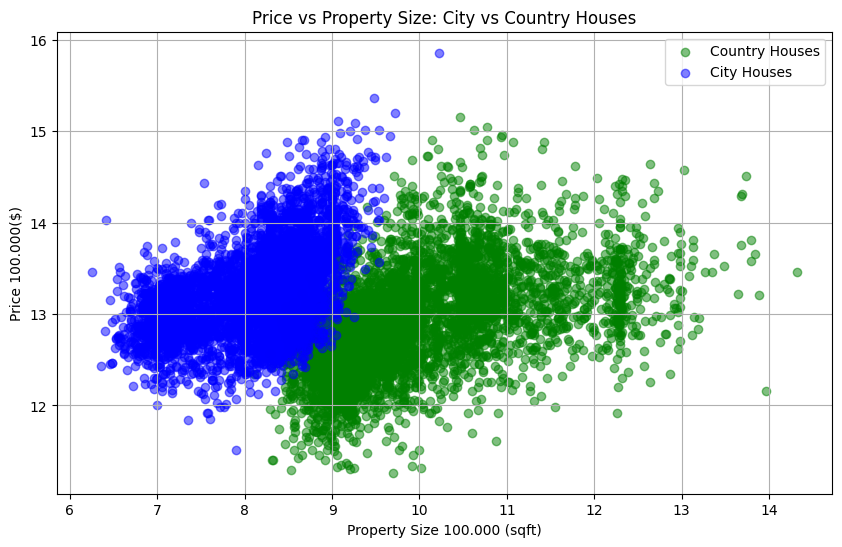

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Scatter for Country Houses
plt.scatter(df_country['log_property_size'], df_country['log_price'], 
            color='green', label='Country Houses', alpha=0.5)

# Scatter for City Houses
plt.scatter(df_city['log_property_size'], df_city['log_price'], 
            color='blue', label='City Houses', alpha=0.5)

plt.xlabel('Property Size 100.000 (sqft)')
plt.ylabel('Price 100.000($)')
plt.title('Price vs Property Size: City vs Country Houses')
plt.legend()
plt.grid(True)
plt.show()

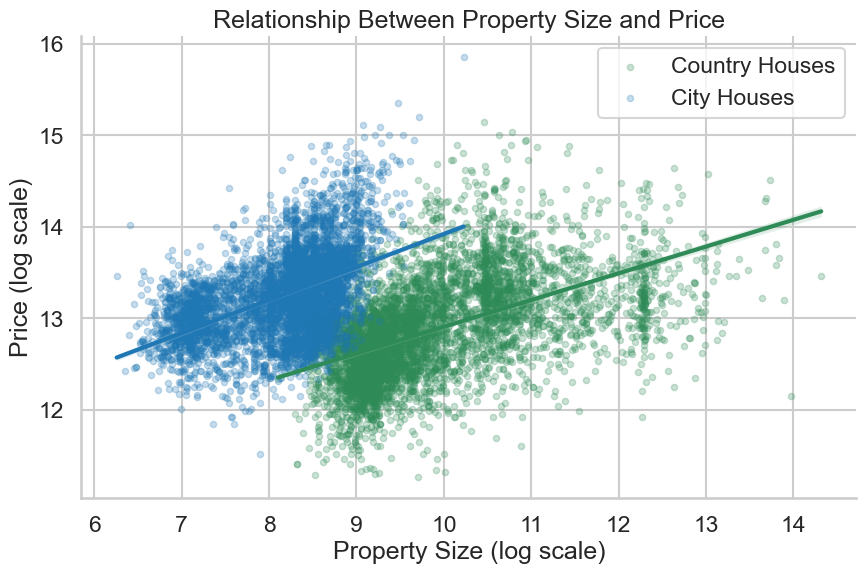

In [ ]:
#for better trend analysis i used a regression plot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

# Country Houses
sns.regplot(
    data=df_country,
    x='log_property_size',
    y='log_price',
    scatter_kws={'alpha':0.25, 's':20},
    line_kws={'linewidth':3},
    color= '#2E8B57',
    label='Country Houses'
)

# City Houses
sns.regplot(
    data=df_city,
    x='log_property_size',
    y='log_price',
    scatter_kws={'alpha':0.25, 's':20},
    line_kws={'linewidth':3},
    color= '#1f77b4',
    label='City Houses'
)

plt.xlabel('Property Size (log scale)')
plt.ylabel('Price (log scale)')
plt.title('Relationship Between Property Size and Price')

plt.legend()
sns.despine()

plt.show()


Initially, we explored, if larger properties drive higher prices more strongly in country areas.
However, after segmenting the data and applying log transformations to account for skewness, we observed that the relationship between property size and price is actually quite similar between city and country houses.

Since total property size behaved similarly across both groups, we shifted the focus from absolute size to value efficiency — specifically price per square foot.

In [101]:
#Calculation of price per square foot
df_eda_project['price_per_sqft'] = df_eda_project['price'] / df_eda_project['sqft_living_area']

In [102]:
#check the values in the new column
df_eda_project[['price', 'sqft_living_area', 'price_per_sqft']].head()


,price,sqft_living_area,price_per_sqft
0,221900.000,1180.000,188.051
1,538000.000,2570.000,209.339
2,180000.000,770.000,233.766
3,604000.000,1960.000,308.163
4,510000.000,1680.000,303.571


In [103]:
#Loading the new column into the sub data frames for city and country houses
df_country = df_eda_project[df_building_density <= q1]
df_city = df_eda_project[df_building_density >= q3]


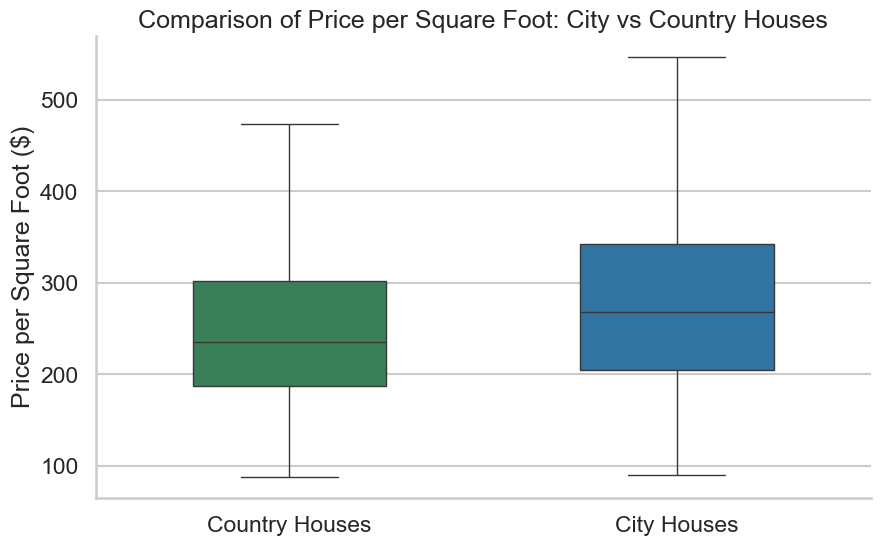

In [105]:
# Box plot for improved comparison and creating copies of the dataframes to ensure that nothing is changed.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_country_plot = df_country.copy()
df_country_plot['group'] = 'Country Houses'

df_city_plot = df_city.copy()
df_city_plot['group'] = 'City Houses'

df_plot = pd.concat([df_country_plot, df_city_plot])

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_plot,
    x='group',
    y='price_per_sqft',
    palette=['#2E8B57', '#1f77b4'],
    width=0.5,
    showfliers=False  
)

plt.xlabel('')
plt.ylabel('Price per Square Foot ($)')
plt.title('Comparison of Price per Square Foot: City vs Country Houses')

sns.despine()
plt.show()


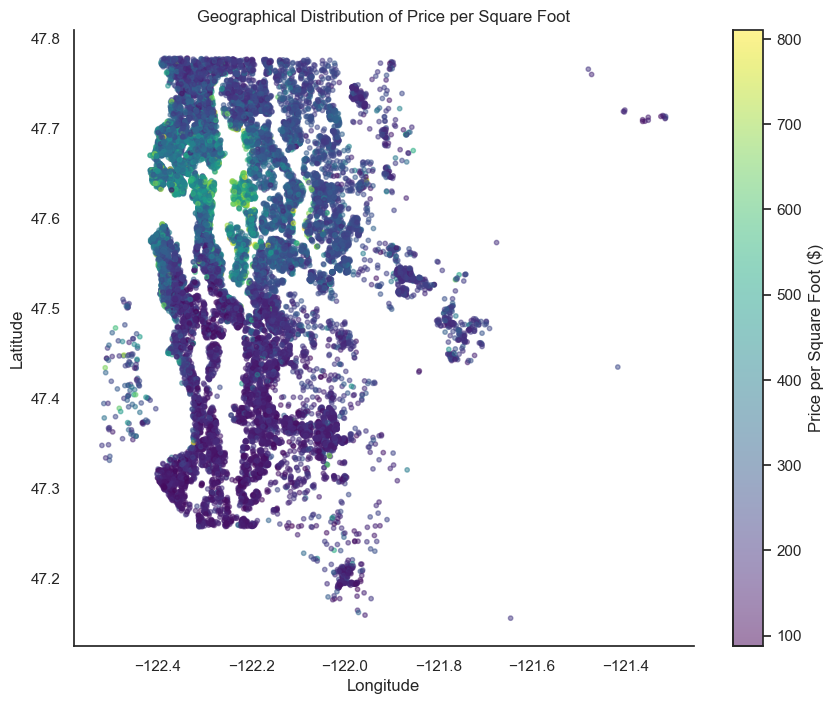

In [ ]:
#Check geographical distribution of price per squarefoot with lat und long values from data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

plt.figure(figsize=(10,8))

plt.scatter(
    df_eda_project['long'],
    df_eda_project['lat'],
    c=df_eda_project['price_per_sqft'],
    cmap='viridis',
    s=10,
    alpha=0.5
)

plt.colorbar(label='Price per Square Foot ($)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Price per Square Foot')

sns.despine()
plt.show()


While total property size behaves similarly across both groups, the value generated per square foot is clearly higher for city houses.
This suggests that urban properties make more efficient use of space.

#### Second adjustment of the first hypothesis: City houses have a higher price per square foot than country houses

### 2. Hypothesis: Country houses that have not been renovated can still command good prices, as buyers prioritize land and location over modern updates.


Pseudocode:
1. We already have our Country Dataframe, which we can work with.
2. We will create a new column to indicate whether a house is renovated or not based on the 'renovation' variable.
3. We will then compare the average prices of renovated and non-renovated country houses to see if there is a significant difference.
4. Visualize the price distribution for both groups using box plots or histograms to further understand the differences.

In [106]:
df_eda_project.columns

Index(['price', 'sale_date', 'id', 'bedrooms', 'bathrooms', 'sqft_living_area',
       'sqft_property_size', 'floors', 'waterfront', 'view', 'condition_house',
       'house_quality', 'sqft_living_area_above_ground',
       'sqft_living_area_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_15_neighbor_living_area',
       'sqft_15_neighbor_property_size', 'sqft_living_area_consistent',
       'property_size_clean', 'log_property_size', 'price_clean', 'log_price',
       'neighbor_property_size_clean', 'log_neighbor_property_size',
       'price_per_sqft'],
      dtype='str')

In [107]:
#Create new column with boolean values: True if the house has been renovated, False if not. Then map these boolean values to 'Renovated' and 'Not Renovated' for better readability in the analysis.
df_eda_project['renovated'] = df_eda_project['yr_renovated'] > 0
df_eda_project['renovated'] = df_eda_project['renovated'].map({True: 'Renovated', False: 'Not Renovated'})

In [108]:
#Loading new column into sub data frame for country houses
df_country = df_eda_project[df_building_density <= q1]

In [109]:
df_country.columns
df_country.value_counts('renovated')

renovated
Not Renovated    5440
Renovated         175
Name: count, dtype: int64

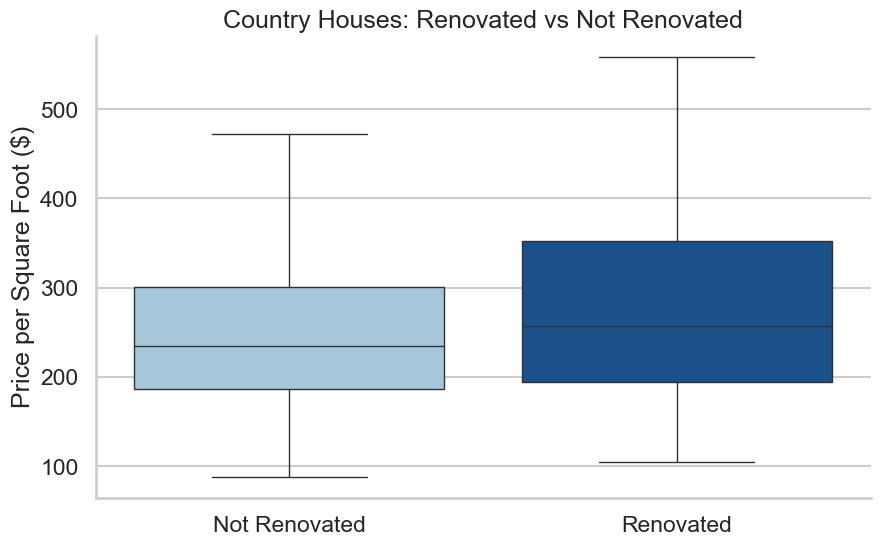

In [ ]:
#Display not renovated houses against renovated houses in rural areas

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_country,
    x='renovated',
    y='price_per_sqft',
    palette=['#9ecae1', '#08519c'],
    showfliers=False
)

plt.xlabel('')
plt.ylabel('Price per Square Foot ($)')
plt.title('Country Houses: Renovated vs Not Renovated')

sns.despine()
plt.show()

Renovated country houses show slightly higher price levels, but the difference is moderate.
So we will compare the renovation status of the city houses with the country houses to see if there is a significant difference in price levels.

In [112]:
#Loading new column into sub data frame for city houses
df_city = df_eda_project[df_building_density >= q3] 

In [113]:
df_city.columns
df_city.value_counts('renovated')

renovated
Not Renovated    5123
Renovated         225
Name: count, dtype: int64

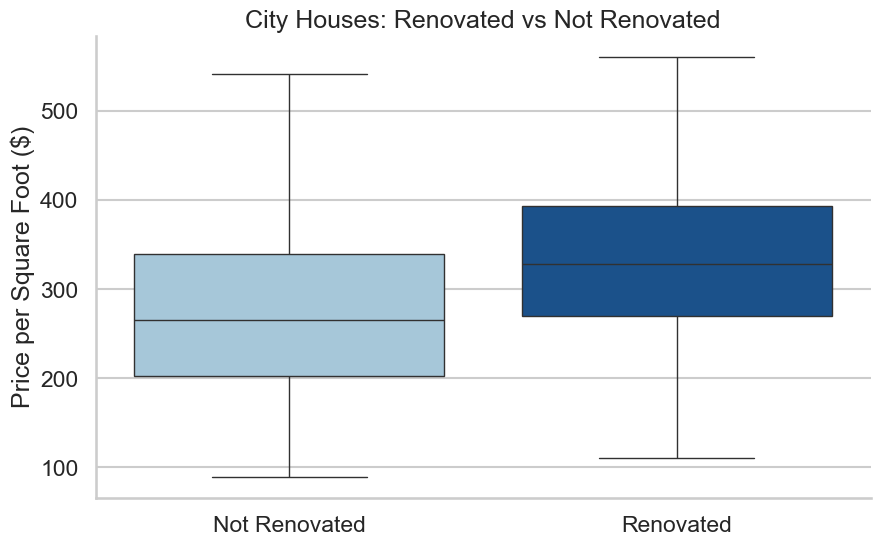

In [129]:
#Doing the same for city areas

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_city,
    x='renovated',
    y='price_per_sqft',
    palette=['#9ecae1', '#08519c'],
    showfliers=False
)

plt.xlabel('')
plt.ylabel('Price per Square Foot ($)')
plt.title('City Houses: Renovated vs Not Renovated')

sns.despine()
plt.show()

In [ ]:
# create country plot
df_country_plot = df_country.copy()
df_country_plot['location'] = 'Country'

In [ ]:
# create city plot 
df_city_plot = df_city.copy()
df_city_plot['location'] = 'City'

In [ ]:
# Combine both plots
df_plot = pd.concat([df_country_plot, df_city_plot])

In [ ]:
# create group to display both parties in box plot
df_plot['group'] = df_plot['location'] + ' - ' + df_plot['renovated']

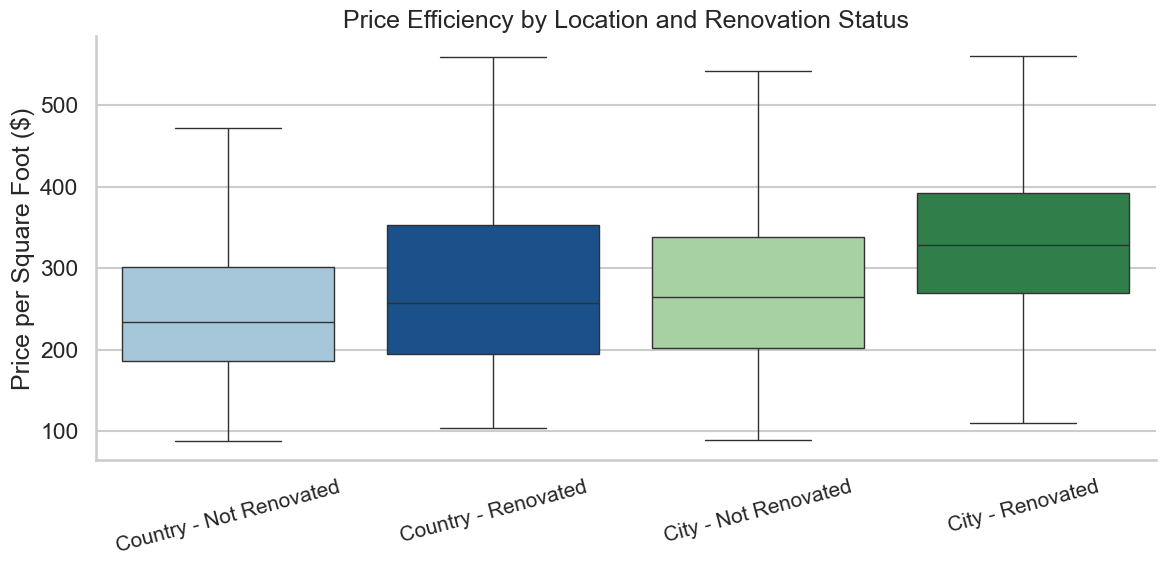

In [116]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df_plot,
    x='group',
    y='price_per_sqft',
    palette=['#9ecae1','#08519c','#a1d99b','#238b45'],
    showfliers=False
)

plt.xlabel('')
plt.ylabel('Price per Square Foot ($)')
plt.title('Price Efficiency by Location and Renovation Status')

sns.despine()
plt.xticks(rotation=15, fontsize = 15)
plt.tight_layout()
plt.show()

#### New Hypothesis: Renovation has a stronger impact on price efficiency in city houses than in country houses.

In [117]:
#Creating new column with title column to display, if house is a city or a country house
df_eda_project['location'] = 'Middle'

In [ ]:
#creating column building densitiy
df_eda_project['building_density'] = df_eda_project['sqft_living_area'] / df_eda_project['sqft_property_size']


In [121]:
df_eda_project.loc[df_eda_project['building_density'] <= q1, 'location'] = 'Country'
df_eda_project.loc[df_eda_project['building_density'] >= q3, 'location'] = 'City'

In [122]:
df_eda_project['location'].value_counts()

location
Middle     10634
Country     5615
City        5348
Name: count, dtype: int64

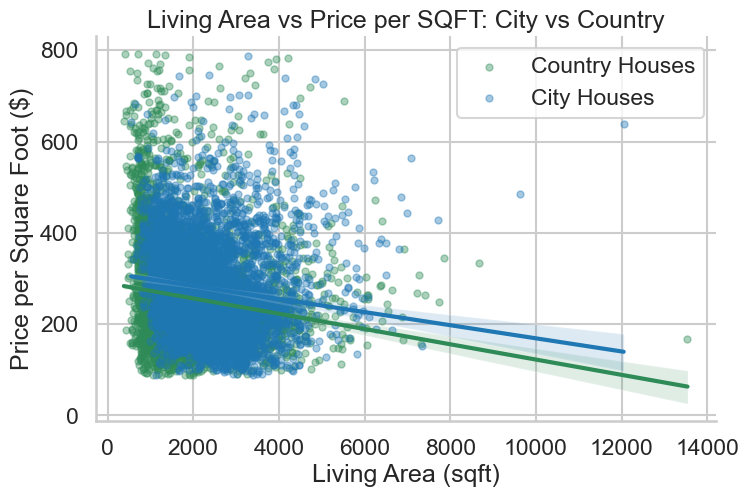

In [ ]:
#Display comparison of City and Country in a regression plot with variables living area and price per sqft
sns.regplot(
    data=df_country,
    x='sqft_living_area',
    y='price_per_sqft',
    scatter_kws={'alpha':0.4, 's':25},
    line_kws={'linewidth': 3},
    color= '#2E8B57', 
    label='Country Houses'   
)
sns.regplot(
    data=df_city,
    x='sqft_living_area',
    y='price_per_sqft',
    scatter_kws={'alpha':0.4, 's':25},
    line_kws={'linewidth': 3},
    color= '#1f77b4', 
    label='City Houses'   
)

plt.xlabel('Living Area (sqft)')
plt.ylabel('Price per Square Foot ($)')
plt.title('Living Area vs Price per SQFT: City vs Country')
plt.legend()
sns.despine()
plt.show()